In [1]:
import matplotlib as mt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns # type: ignore

# Import file

In [2]:
app = pd.read_csv(r"D:\Downloads\archive\application_data.csv")
app

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## Feature selection


In [3]:
print(app.shape)


(307511, 122)


In [4]:
missing_info = pd.DataFrame(app.isnull().sum().sort_values()).reset_index()
missing_info.rename(columns={'index':'Col_name',0:'null_value'},inplace=True)
missing_info['msng_prct'] = missing_info['null_value']/app.shape[0]*100
print(missing_info)
print(missing_info.shape)


                        Col_name  null_value  msng_prct
0                     SK_ID_CURR           0   0.000000
1        HOUR_APPR_PROCESS_START           0   0.000000
2     REG_REGION_NOT_WORK_REGION           0   0.000000
3    LIVE_REGION_NOT_WORK_REGION           0   0.000000
4         REG_CITY_NOT_LIVE_CITY           0   0.000000
..                           ...         ...        ...
117     NONLIVINGAPARTMENTS_MEDI      213514  69.432963
118     NONLIVINGAPARTMENTS_MODE      213514  69.432963
119              COMMONAREA_MODE      214865  69.872297
120               COMMONAREA_AVG      214865  69.872297
121              COMMONAREA_MEDI      214865  69.872297

[122 rows x 3 columns]
(122, 3)


In [5]:
msng_col = missing_info[missing_info['msng_prct']>=40]['Col_name'].to_list()
print(msng_col)
print(len(msng_col))


['EMERGENCYSTATE_MODE', 'TOTALAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_AVG', 'FLOORSMAX_MEDI', 'FLOORSMAX_MODE', 'HOUSETYPE_MODE', 'LIVINGAREA_AVG', 'LIVINGAREA_MODE', 'LIVINGAREA_MEDI', 'ENTRANCES_AVG', 'ENTRANCES_MODE', 'ENTRANCES_MEDI', 'APARTMENTS_MEDI', 'APARTMENTS_AVG', 'APARTMENTS_MODE', 'WALLSMATERIAL_MODE', 'ELEVATORS_MEDI', 'ELEVATORS_AVG', 'ELEVATORS_MODE', 'NONLIVINGAREA_MODE', 'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MEDI', 'EXT_SOURCE_1', 'BASEMENTAREA_MODE', 'BASEMENTAREA_AVG', 'BASEMENTAREA_MEDI', 'LANDAREA_MEDI', 'LANDAREA_AVG', 'LANDAREA_MODE', 'OWN_CAR_AGE', 'YEARS_BUILD_MODE', 'YEARS_BUILD_AVG', 'YEARS_BUILD_MEDI', 'FLOORSMIN_AVG', 'FLOORSMIN_MODE', 'FLOORSMIN_MEDI', 'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MODE', 'COMMONAREA_MODE', 'COMMONAREA_AVG', 'COMMONAREA_MEDI

In [6]:
app_msng_rmvd = app.drop(labels= msng_col,axis=1)
app_msng_rmvd.shape


(307511, 73)

In [7]:
app_msng_rmvd

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
flag_col = []

for col in app_msng_rmvd:
    if col.startswith('FLAG_'):
        flag_col.append(col)

flag_col.__len__()

28

In [9]:
print(flag_col)

['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']


In [10]:
app_msng_rmvd[flag_col].head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,N,Y,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,N,N,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Y,Y,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,N,Y,1,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,N,Y,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
flag_trgt_col = app_msng_rmvd[flag_col + ['TARGET']]
flag_trgt_col

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,...,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TARGET
0,N,Y,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,N,N,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Y,Y,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,N,Y,1,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,N,Y,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,N,N,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
307507,N,Y,1,0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
307508,N,Y,1,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
307509,N,Y,1,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [12]:
for i,col in enumerate(flag_trgt_col):
    print( col)

FLAG_OWN_CAR
FLAG_OWN_REALTY
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
FLAG_DOCUMENT_2
FLAG_DOCUMENT_3
FLAG_DOCUMENT_4
FLAG_DOCUMENT_5
FLAG_DOCUMENT_6
FLAG_DOCUMENT_7
FLAG_DOCUMENT_8
FLAG_DOCUMENT_9
FLAG_DOCUMENT_10
FLAG_DOCUMENT_11
FLAG_DOCUMENT_12
FLAG_DOCUMENT_13
FLAG_DOCUMENT_14
FLAG_DOCUMENT_15
FLAG_DOCUMENT_16
FLAG_DOCUMENT_17
FLAG_DOCUMENT_18
FLAG_DOCUMENT_19
FLAG_DOCUMENT_20
FLAG_DOCUMENT_21
TARGET


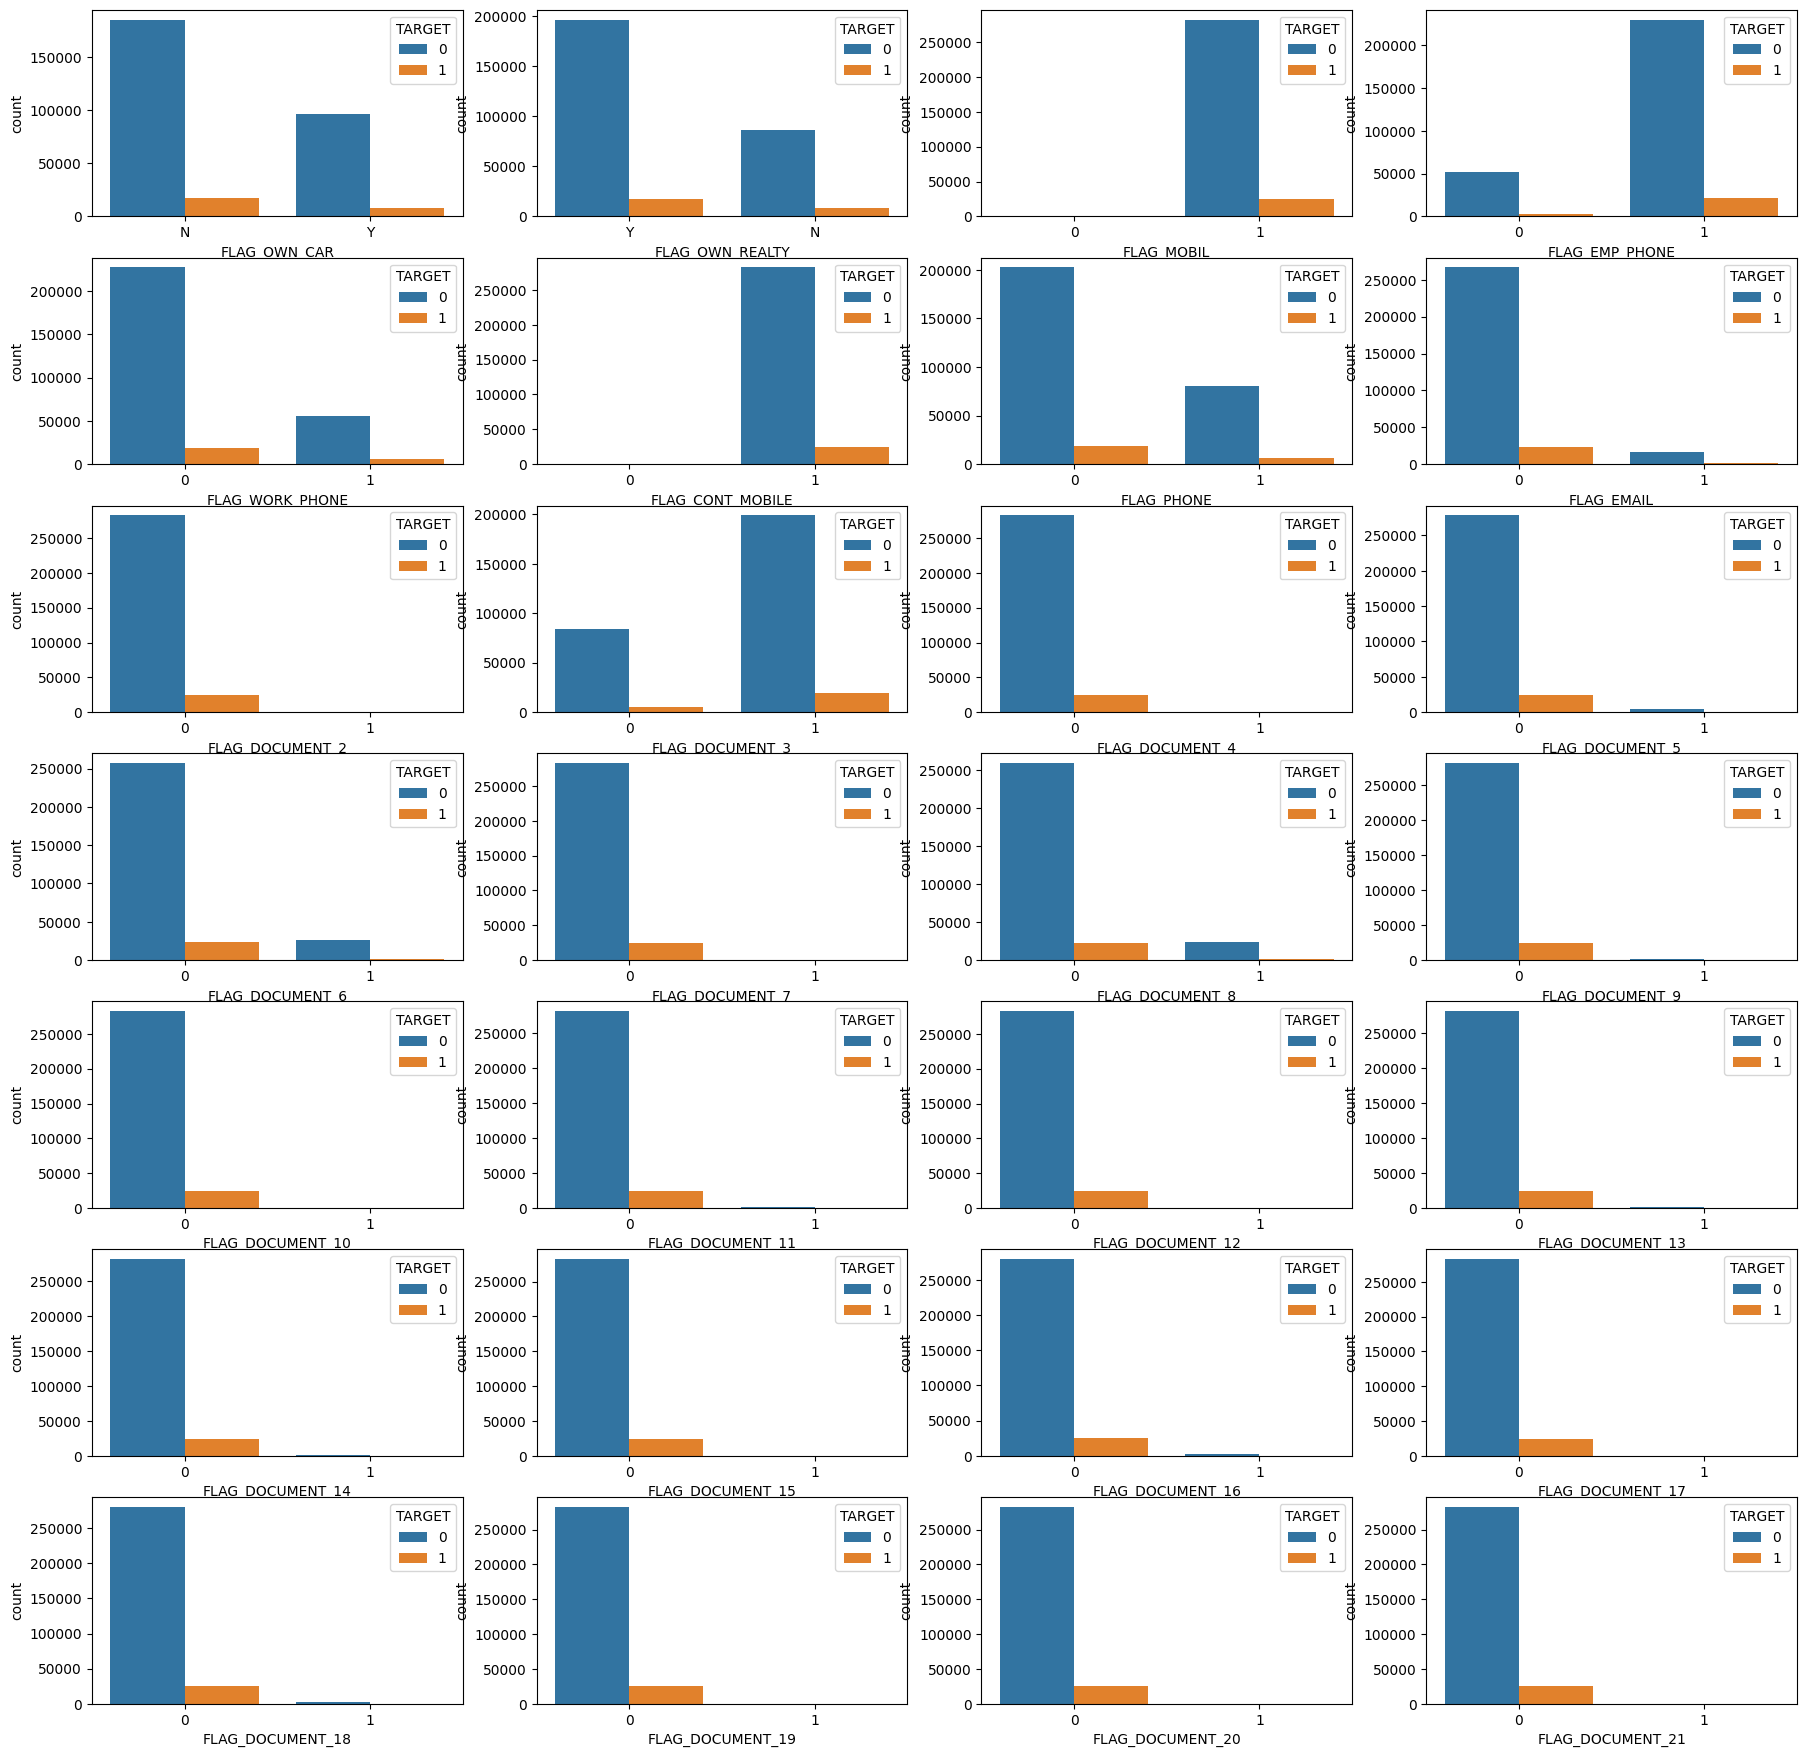

In [13]:
plt.figure(figsize=(22,22))

for i, col in enumerate(flag_trgt_col):
    if i+1 <29:
        plt.subplot(7,4,i+1)
        sns.countplot(data=flag_trgt_col, x=col, hue = 'TARGET')



In [14]:
flag_corr_df = app_msng_rmvd.loc[:,['FLAG_OWN_CAR','FLAG_OWN_REALTY','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE',
                                  'FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_DOCUMENT_3','TARGET']]


flag_corr_df

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_DOCUMENT_3,TARGET
0,N,Y,1,1,0,1,1,1,1
1,N,N,1,1,0,1,1,1,0
2,Y,Y,1,1,1,1,1,0,0
3,N,Y,1,1,0,1,0,1,0
4,N,Y,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
307506,N,N,1,1,0,1,0,0,0
307507,N,Y,1,0,0,1,1,1,0
307508,N,Y,1,1,0,1,0,1,0
307509,N,Y,1,1,0,1,0,1,1


In [15]:
flag_corr_df

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_DOCUMENT_3,TARGET
0,N,Y,1,1,0,1,1,1,1
1,N,N,1,1,0,1,1,1,0
2,Y,Y,1,1,1,1,1,0,0
3,N,Y,1,1,0,1,0,1,0
4,N,Y,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
307506,N,N,1,1,0,1,0,0,0
307507,N,Y,1,0,0,1,1,1,0
307508,N,Y,1,1,0,1,0,1,0
307509,N,Y,1,1,0,1,0,1,1


In [16]:
flag_corr_df['FLAG_OWN_CAR'] = flag_corr_df['FLAG_OWN_CAR'].replace({'Y':1,'N':0})
flag_corr_df['FLAG_OWN_REALTY'] = flag_corr_df['FLAG_OWN_REALTY'].replace({"Y":1,'N':0})

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6128\4003626067.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  flag_corr_df['FLAG_OWN_CAR'] = flag_corr_df['FLAG_OWN_CAR'].replace({'Y':1,'N':0})
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6128\4003626067.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  flag_corr_df['FLAG_OWN_REALTY'] = flag_corr_df['FLAG_OWN_REALTY'].replace({"Y":1,'N':0})


In [17]:
flag_corr_df

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_DOCUMENT_3,TARGET
0,0,1,1,1,0,1,1,1,1
1,0,0,1,1,0,1,1,1,0
2,1,1,1,1,1,1,1,0,0
3,0,1,1,1,0,1,0,1,0
4,0,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
307506,0,0,1,1,0,1,0,0,0
307507,0,1,1,0,0,1,1,1,0
307508,0,1,1,1,0,1,0,1,0
307509,0,1,1,1,0,1,0,1,1


<Axes: >

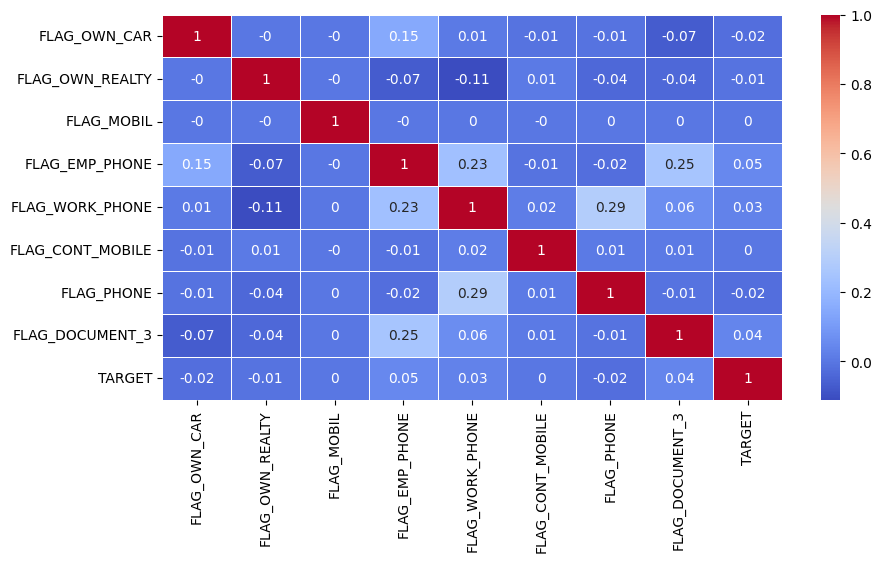

In [18]:
corr_df = round(flag_corr_df.corr(),2)
plt.figure(figsize=(10,5))
sns.heatmap(corr_df,cmap='coolwarm',linewidths=0.5, annot = True)


In [19]:
app_flag_rmvd = app_msng_rmvd.drop(labels=['FLAG_OWN_CAR','FLAG_OWN_REALTY','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE',
                                  'FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_DOCUMENT_3'],axis=1)
app_flag_rmvd

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
flag_col_v2 = []
for col in app_flag_rmvd:
    if col.startswith('FLAG'):
        flag_col_v2.append(col)
flag_col_v2

['FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [21]:
app_flag_rmvd = app_flag_rmvd.drop(labels= flag_col_v2, axis=1)
app_flag_rmvd.shape

(307511, 45)

In [22]:
app_flag_rmvd

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,...,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,...,0.0,0.0,0.0,-273.0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,...,0.0,6.0,0.0,-1909.0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,...,0.0,0.0,0.0,-322.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: >

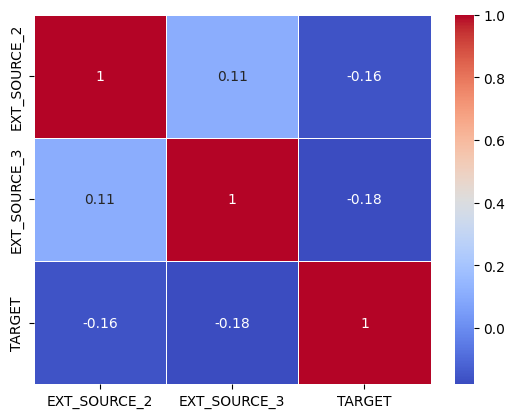

In [23]:
sns.heatmap(data=round(app_flag_rmvd[['EXT_SOURCE_2','EXT_SOURCE_3','TARGET']].corr(),2),cmap='coolwarm',linewidths=.5,annot=True)

In [24]:
app_score_col_rmvd = app_flag_rmvd.drop(labels=(['EXT_SOURCE_2','EXT_SOURCE_3']),axis=1)
app_score_col_rmvd

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,...,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,...,0.0,0.0,0.0,-273.0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,...,0.0,6.0,0.0,-1909.0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,...,0.0,0.0,0.0,-322.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
app_score_col_rmvd.shape

(307511, 43)

# Feature Engineering


In [26]:
app_score_col_rmvd.isnull().sum().sort_values()/app_score_col_rmvd.shape[0]
# pd.reset_option('display.max_rows',50)

SK_ID_CURR                     0.000000
ORGANIZATION_TYPE              0.000000
LIVE_CITY_NOT_WORK_CITY        0.000000
REG_CITY_NOT_WORK_CITY         0.000000
REG_CITY_NOT_LIVE_CITY         0.000000
LIVE_REGION_NOT_WORK_REGION    0.000000
REG_REGION_NOT_WORK_REGION     0.000000
REG_REGION_NOT_LIVE_REGION     0.000000
HOUR_APPR_PROCESS_START        0.000000
WEEKDAY_APPR_PROCESS_START     0.000000
REGION_RATING_CLIENT_W_CITY    0.000000
DAYS_ID_PUBLISH                0.000000
DAYS_REGISTRATION              0.000000
DAYS_EMPLOYED                  0.000000
DAYS_BIRTH                     0.000000
REGION_RATING_CLIENT           0.000000
NAME_HOUSING_TYPE              0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
REGION_POPULATION_RELATIVE     0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
CODE_GENDER                    0.000000
NAME_INCOME_TYPE               0.000000


### Missing Imputation


In [27]:
app_score_col_rmvd['CNT_FAM_MEMBERS'].fillna(app_score_col_rmvd['CNT_FAM_MEMBERS'].mode().iloc[0],inplace = True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6128\3828363424.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  app_score_col_rmvd['CNT_FAM_MEMBERS'].fillna(app_score_col_rmvd['CNT_FAM_MEMBERS'].mode().iloc[0],inplace = True)


In [28]:
app_score_col_rmvd['OCCUPATION_TYPE'].fillna(app_score_col_rmvd['OCCUPATION_TYPE'].mode()[0],inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6128\2020364574.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  app_score_col_rmvd['OCCUPATION_TYPE'].fillna(app_score_col_rmvd['OCCUPATION_TYPE'].mode()[0],inplace=True)


In [29]:
app_score_col_rmvd['NAME_TYPE_SUITE'].fillna(app_score_col_rmvd['NAME_TYPE_SUITE'].mode()[0],inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6128\2397323613.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  app_score_col_rmvd['NAME_TYPE_SUITE'].fillna(app_score_col_rmvd['NAME_TYPE_SUITE'].mode()[0],inplace=True)


In [30]:
app_score_col_rmvd['AMT_ANNUITY'].fillna(app_score_col_rmvd['AMT_ANNUITY'].mean(),inplace = True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6128\3527681942.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  app_score_col_rmvd['AMT_ANNUITY'].fillna(app_score_col_rmvd['AMT_ANNUITY'].mean(),inplace = True)


In [31]:
amt_req_col = []

for col in app_score_col_rmvd:
    if col.startswith('AMT_REQ_CREDIT'):
        amt_req_col.append(col)

amt_req_col


['AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [32]:
# for col in amt_req_col:
#     app_score_col_rmvd[col].fillna(app_score_col_rmvd[col].median(),inplace=True)

app_score_col_rmvd[amt_req_col].isnull().sum()

AMT_REQ_CREDIT_BUREAU_HOUR    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
dtype: int64

In [33]:
app_score_col_rmvd['AMT_GOODS_PRICE'].fillna(app_score_col_rmvd['AMT_GOODS_PRICE'].median(), inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6128\3437478885.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  app_score_col_rmvd['AMT_GOODS_PRICE'].fillna(app_score_col_rmvd['AMT_GOODS_PRICE'].median(), inplace=True)


### Value Modification

In [34]:
days_col = []

for col in app_score_col_rmvd:
    if col.startswith('DAYS_'):
        days_col.append(col)

days_col

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [35]:
for col in days_col:
    app_score_col_rmvd[col] = app_score_col_rmvd[col].apply(abs)

app_score_col_rmvd[days_col].isnull().sum()

DAYS_BIRTH                0
DAYS_EMPLOYED             0
DAYS_REGISTRATION         0
DAYS_ID_PUBLISH           0
DAYS_LAST_PHONE_CHANGE    1
dtype: int64

In [36]:
app_score_col_rmvd[days_col]

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,9461,637,3648.0,2120,1134.0
1,16765,1188,1186.0,291,828.0
2,19046,225,4260.0,2531,815.0
3,19005,3039,9833.0,2437,617.0
4,19932,3038,4311.0,3458,1106.0
...,...,...,...,...,...
307506,9327,236,8456.0,1982,273.0
307507,20775,365243,4388.0,4090,0.0
307508,14966,7921,6737.0,5150,1909.0
307509,11961,4786,2562.0,931,322.0


In [37]:
print(app_score_col_rmvd.nunique().sort_values(ascending=False))
print(app_score_col_rmvd.dtypes)

SK_ID_CURR                     307511
DAYS_BIRTH                      17460
DAYS_REGISTRATION               15688
AMT_ANNUITY                     13673
DAYS_EMPLOYED                   12574
DAYS_ID_PUBLISH                  6168
AMT_CREDIT                       5603
DAYS_LAST_PHONE_CHANGE           3773
AMT_INCOME_TOTAL                 2548
AMT_GOODS_PRICE                  1002
REGION_POPULATION_RELATIVE         81
ORGANIZATION_TYPE                  58
OBS_60_CNT_SOCIAL_CIRCLE           33
OBS_30_CNT_SOCIAL_CIRCLE           33
AMT_REQ_CREDIT_BUREAU_YEAR         25
HOUR_APPR_PROCESS_START            24
AMT_REQ_CREDIT_BUREAU_MON          24
OCCUPATION_TYPE                    18
CNT_FAM_MEMBERS                    17
CNT_CHILDREN                       15
AMT_REQ_CREDIT_BUREAU_QRT          11
DEF_30_CNT_SOCIAL_CIRCLE           10
AMT_REQ_CREDIT_BUREAU_WEEK          9
AMT_REQ_CREDIT_BUREAU_DAY           9
DEF_60_CNT_SOCIAL_CIRCLE            9
NAME_INCOME_TYPE                    8
WEEKDAY_APPR

### Outlier Detection and Treatment

In [38]:
app_score_col_rmvd['AMT_GOODS_PRICE'].agg(['min','max','mean','median','std'])


min       4.050000e+04
max       4.050000e+06
mean      5.383163e+05
median    4.500000e+05
std       3.692890e+05
Name: AMT_GOODS_PRICE, dtype: float64

<Axes: xlabel='AMT_GOODS_PRICE', ylabel='Density'>

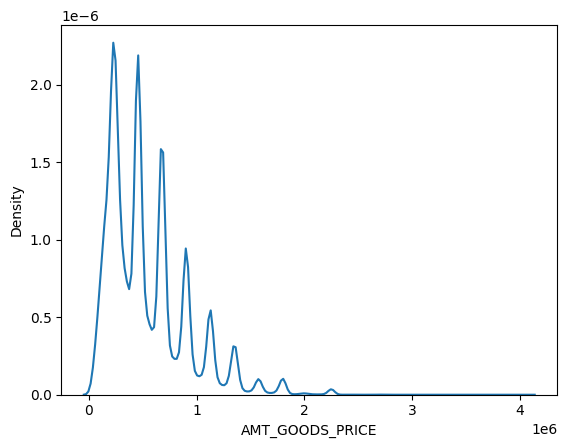

In [39]:
sns.kdeplot(data=app_score_col_rmvd,x='AMT_GOODS_PRICE')

<Axes: xlabel='AMT_GOODS_PRICE'>

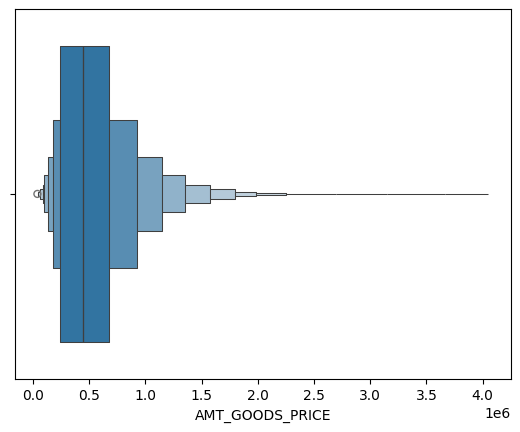

In [40]:
sns.boxenplot(data=app_score_col_rmvd,x='AMT_GOODS_PRICE')

### Binning


Text(0.5, 1.0, 'AMT_GOODS_PRICE_RANGE')

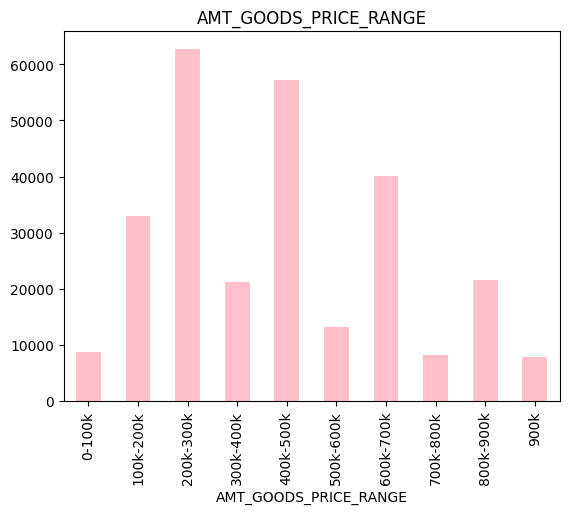

In [41]:
bins=[0, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000]
labels=['0-100k', '100k-200k', '200k-300k', '300k-400k', '400k-500k', '500k-600k', '600k-700k', '700k-800k', '800k-900k', '900k']
app_score_col_rmvd['AMT_GOODS_PRICE_RANGE'] = pd.cut(app_score_col_rmvd['AMT_GOODS_PRICE'],bins=bins,labels=labels)
app_score_col_rmvd['AMT_GOODS_PRICE_RANGE'].value_counts().sort_index(ascending=True).plot(kind='bar', color = 'pink')
plt.title('AMT_GOODS_PRICE_RANGE')

In [42]:
app_score_col_rmvd['AMT_INCOME_TOTAL'].count()

307511

In [43]:
app_score_col_rmvd['AMT_INCOME_TOTAL'].quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99])

0.10     81000.0
0.20     99000.0
0.30    112500.0
0.40    135000.0
0.50    147150.0
0.60    162000.0
0.70    180000.0
0.80    225000.0
0.90    270000.0
0.99    472500.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [44]:
app_score_col_rmvd['AMT_INCOME_TOTAL'].agg(['min','max','median'])

min           25650.0
max       117000000.0
median       147150.0
Name: AMT_INCOME_TOTAL, dtype: float64

Text(0.5, 1.0, 'AMT_INCOME_TOTAL_RANGE')

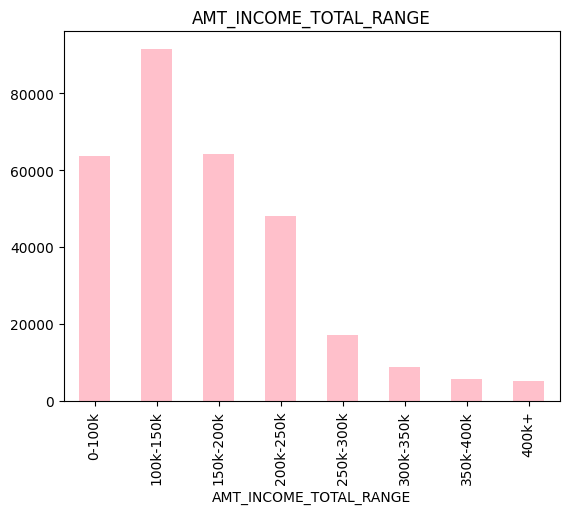

In [45]:
bins  = [0,100000,150000,200000,250000,300000,350000,400000,472500]
labels = ['0-100k', '100k-150k', '150k-200k', '200k-250k', '250k-300k', '300k-350k', '350k-400k', '400k+']
app_score_col_rmvd['AMT_INCOME_TOTAL_RANGE'] = pd.cut(app_score_col_rmvd['AMT_INCOME_TOTAL'],bins = bins,labels=labels)
app_score_col_rmvd['AMT_INCOME_TOTAL_RANGE'].value_counts().sort_index(ascending=True).plot(kind='bar', color = 'pink')
plt.title('AMT_INCOME_TOTAL_RANGE')

In [46]:
app_score_col_rmvd['AMT_CREDIT'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99])

0.10     180000.0
0.20     254700.0
0.30     306306.0
0.40     432000.0
0.50     513531.0
0.60     604152.0
0.70     755190.0
0.80     900000.0
0.90    1133748.0
0.95    1350000.0
0.99    1854000.0
Name: AMT_CREDIT, dtype: float64

In [47]:
app_score_col_rmvd['AMT_CREDIT'].agg(['min','max','median'])

min         45000.0
max       4050000.0
median     513531.0
Name: AMT_CREDIT, dtype: float64

Text(0.5, 1.0, 'AMT_CREDIT_RANGE')

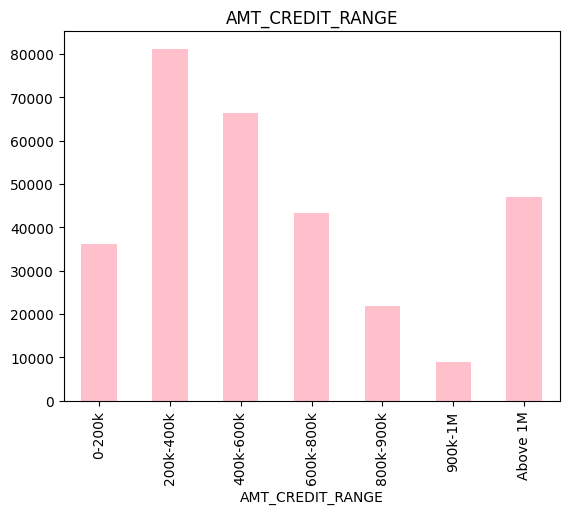

In [48]:
bins  = [0,200000,400000,600000,800000,900000,1000000,1854000]
labels = ['0-200k', '200k-400k', '400k-600k', '600k-800k','800k-900k' ,'900k-1M','Above 1M']
app_score_col_rmvd['AMT_CREDIT_RANGE'] = pd.cut(app_score_col_rmvd['AMT_CREDIT'],bins = bins,labels=labels)
app_score_col_rmvd['AMT_CREDIT_RANGE'].value_counts().sort_index(ascending=True).plot(kind='bar', color = 'pink')
plt.title('AMT_CREDIT_RANGE')

In [49]:
app_score_col_rmvd['AMT_ANNUITY'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99])

0.10    11074.5
0.20    14701.5
0.30    18189.0
0.40    21870.0
0.50    24903.0
0.60    28062.0
0.70    32004.0
0.80    37516.5
0.90    45954.0
0.95    53325.0
0.99    70006.5
Name: AMT_ANNUITY, dtype: float64

Text(0.5, 1.0, 'AMT_ANNUITY_RANGE')

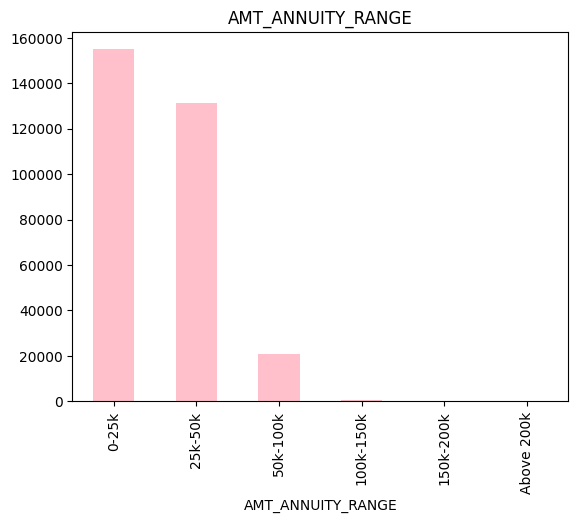

In [50]:
bins = [0,25000,50000,100000,150000,200000,258025.5]
labels = ['0-25k','25k-50k','50k-100k','100k-150k','150k-200k','Above 200k']
app_score_col_rmvd['AMT_ANNUITY_RANGE'] = pd.cut(app_score_col_rmvd['AMT_ANNUITY'], bins = bins, labels=labels) 
app_score_col_rmvd['AMT_ANNUITY_RANGE'].value_counts().sort_index(ascending=True).plot(kind='bar', color = 'pink')
plt.title('AMT_ANNUITY_RANGE')

In [51]:
app_score_col_rmvd['DAYS_EMPLOYED'].agg(['min','max','median'])

min            0.0
max       365243.0
median      2219.0
Name: DAYS_EMPLOYED, dtype: float64

In [52]:
app_score_col_rmvd['DAYS_EMPLOYED'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99])

0.10       392.0
0.20       749.0
0.30      1132.0
0.40      1597.0
0.50      2219.0
0.60      3032.0
0.70      4435.0
0.80      9188.0
0.90    365243.0
0.95    365243.0
0.99    365243.0
Name: DAYS_EMPLOYED, dtype: float64

Text(0.5, 1.0, 'DAYS_EMPLOYEED_RANGE')

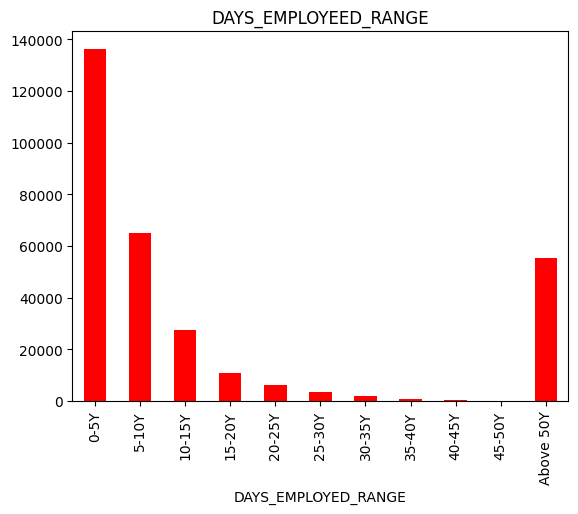

In [53]:
bins = [0,1825,3650,5475, 7300, 9125, 10950, 12775, 14600 ,16425, 18250,365243 ]
labels = ['0-5Y','5-10Y','10-15Y','15-20Y','20-25Y','25-30Y','30-35Y','35-40Y','40-45Y','45-50Y','Above 50Y']
app_score_col_rmvd['DAYS_EMPLOYED_RANGE'] = pd.cut(app_score_col_rmvd['DAYS_EMPLOYED'],bins=bins,labels=labels)
app_score_col_rmvd['DAYS_EMPLOYED_RANGE'].value_counts().sort_index(ascending=True).plot(kind = 'bar' , color = 'red')
plt.title('DAYS_EMPLOYEED_RANGE')

In [54]:
app_score_col_rmvd['AMT_ANNUITY_RANGE'].isnull().sum()

0

### DATA ANALYSIS

In [55]:
app_score_col_rmvd.dtypes.value_counts()

float64     18
int64       15
object      10
category     1
category     1
category     1
category     1
category     1
Name: count, dtype: int64

In [56]:
app_score_col_rmvd.select_dtypes(include=['object']).nunique().sort_values(ascending=False)

ORGANIZATION_TYPE             58
OCCUPATION_TYPE               18
NAME_INCOME_TYPE               8
NAME_TYPE_SUITE                7
WEEKDAY_APPR_PROCESS_START     7
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
NAME_EDUCATION_TYPE            5
CODE_GENDER                    3
NAME_CONTRACT_TYPE             2
dtype: int64

In [57]:
obj_var = (app_score_col_rmvd.select_dtypes(include=['object']).columns)
obj_var

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')

<Axes: xlabel='NAME_CONTRACT_TYPE', ylabel='count'>

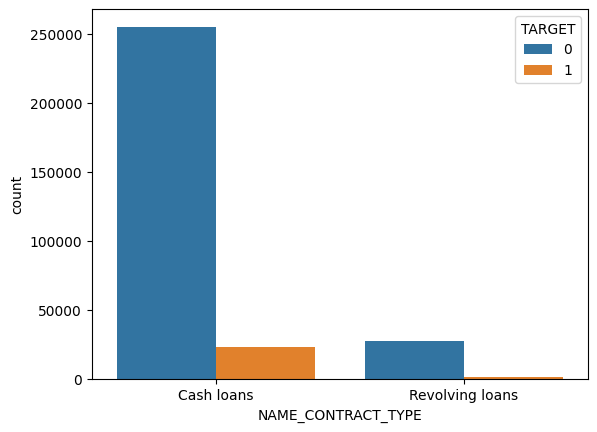

In [58]:
sns.countplot(data=app_score_col_rmvd, x='NAME_CONTRACT_TYPE', hue='TARGET')

In [59]:
data_pct = app_score_col_rmvd[['NAME_CONTRACT_TYPE','TARGET']].groupby(['NAME_CONTRACT_TYPE'],as_index=False).mean()
data_pct

,NAME_CONTRACT_TYPE,TARGET
0,Cash loans,0.083459
1,Revolving loans,0.054783


<Axes: xlabel='NAME_CONTRACT_TYPE', ylabel='TARGET'>

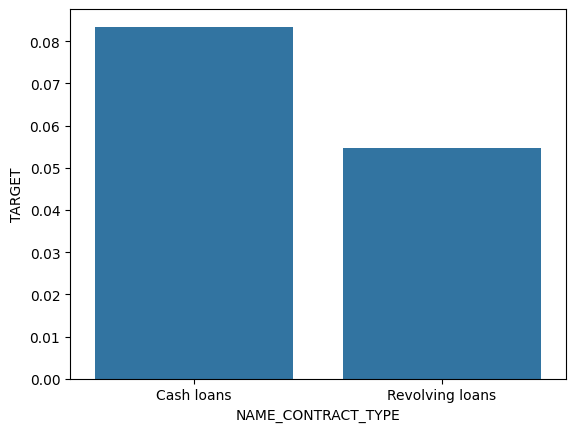

In [60]:
sns.barplot(data=data_pct,x='NAME_CONTRACT_TYPE',y='TARGET')

##### How to plot two different chart side by side for comparision

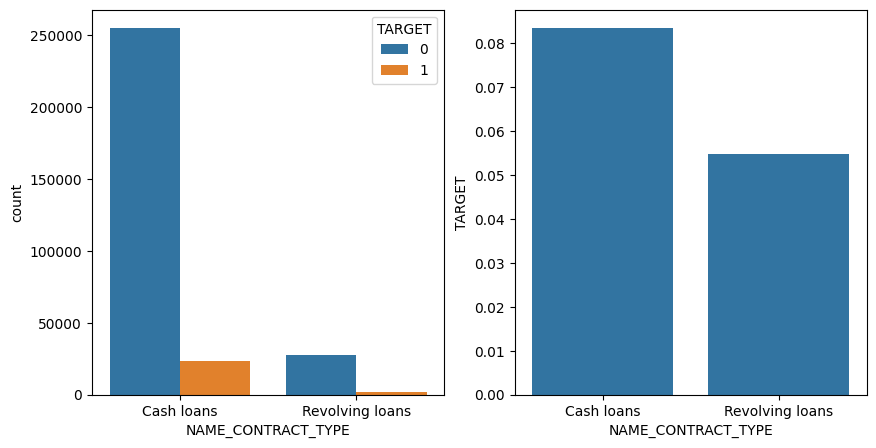

 Most of the customers have tavlen cash loan 
 customers who have taken cash  loan csutomer who have tanken cash loans are likely to default


In [90]:
plt.figure(figsize=(10,5)) #ploting figure size

plt.subplot(1,2,1)  # mentioning the subplot 1
sns.countplot(data=app_score_col_rmvd, x='NAME_CONTRACT_TYPE', hue='TARGET')

plt.subplot(1,2,2)  # mentioning the subplot 2
sns.barplot(data=data_pct,x='NAME_CONTRACT_TYPE',y='TARGET')
plt.show() #showing the plot
print(' Most of the customers have tavlen cash loan \n customers who have taken cash  loan csutomer who have tanken cash loans are likely to default')

# plt.title('Most of the customers have taken cash loan customers,customer who have taken cash loans are less likely to be defaulted')

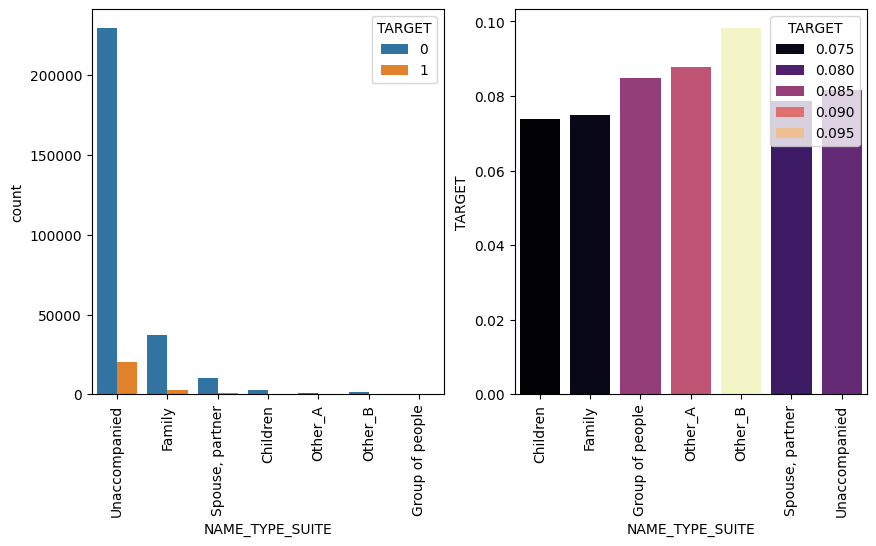

unacompanied by family members are more likely to default 
 unacompanied people had takenmost of the loans and the default rate is ~8.5% which is still okay


In [91]:
data_pct_suite = app_score_col_rmvd[['NAME_TYPE_SUITE','TARGET']].groupby(['NAME_TYPE_SUITE'],as_index=False).mean()
data_pct_suite

plt.figure(figsize=(10,5)) #ploting figure size

plt.subplot(1,2,1)  # mentioning the subplot 1
sns.countplot(data=app_score_col_rmvd, x='NAME_TYPE_SUITE', hue='TARGET')
plt.xticks(rotation=90) #rotating the x axis labels

plt.subplot(1,2,2)  # mentioning the subplot 2
sns.barplot(data=data_pct_suite,x='NAME_TYPE_SUITE',y='TARGET', hue='TARGET' ,palette='magma')
plt.xticks(rotation=90) #rotating the x axis labels
plt.show() #showing the plot

print('unacompanied by family members are more likely to default \n unacompanied people had taken' \
'most of the loans and the default rate is ~8.5% which is still okay')


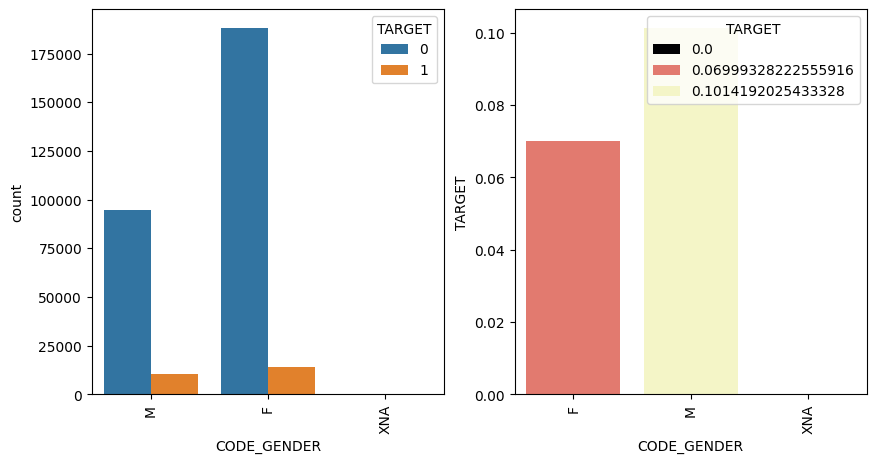

most of the loans have been taken by the feamle customers
 and the default rate is ~7% whcih is safer adn lesser than male


In [92]:
data_pct_gender= app_score_col_rmvd[['CODE_GENDER','TARGET']].groupby(['CODE_GENDER'],as_index=False).mean()
data_pct_gender

plt.figure(figsize=(10,5)) #ploting figure size

plt.subplot(1,2,1)  # mentioning the subplot 1
sns.countplot(data=app_score_col_rmvd, x='CODE_GENDER', hue='TARGET')
plt.xticks(rotation=90) #rotating the x axis labels

plt.subplot(1,2,2)  # mentioning the subplot 2
sns.barplot(data=data_pct_gender,x='CODE_GENDER',y='TARGET', hue='TARGET' ,palette='magma')
plt.xticks(rotation=90) #rotating the x axis labels
plt.show() #showing the plot

print ('most of the loans have been taken by the feamle customers\n and the default rate is ~7% whcih is safer adn lesser than male')

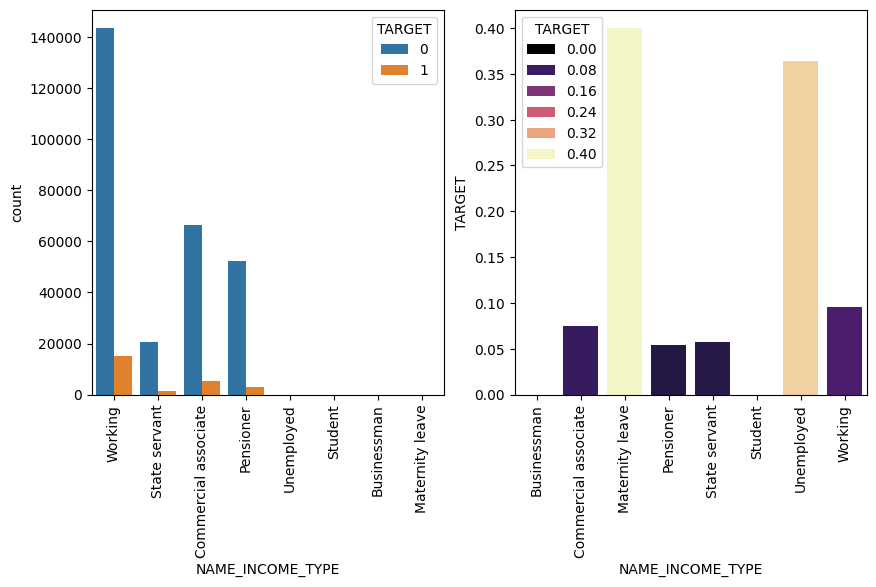

the safest segments are wroking , commercial associates and pensioners 
  maternity leave and unemployeed cutomers are more likely to default 



In [94]:
data_pct_income= app_score_col_rmvd[['NAME_INCOME_TYPE','TARGET']].groupby(['NAME_INCOME_TYPE'],as_index=False).mean()
data_pct_income

plt.figure(figsize=(10,5)) #ploting figure size

plt.subplot(1,2,1)  # mentioning the subplot 1
sns.countplot(data=app_score_col_rmvd, x='NAME_INCOME_TYPE',hue='TARGET')
plt.xticks(rotation=90) #rotating the x axis labels

plt.subplot(1,2,2)  # mentioning the subplot 2
sns.barplot(data=data_pct_income,x='NAME_INCOME_TYPE',y='TARGET', hue='TARGET' ,palette='magma')
plt.xticks(rotation=90) #rotating the x axis labels
plt.show() #showing the plot

print('the safest segments are wroking , commercial associates and pensioners \n  maternity leave and unemployeed cutomers are more likely to default \n' )

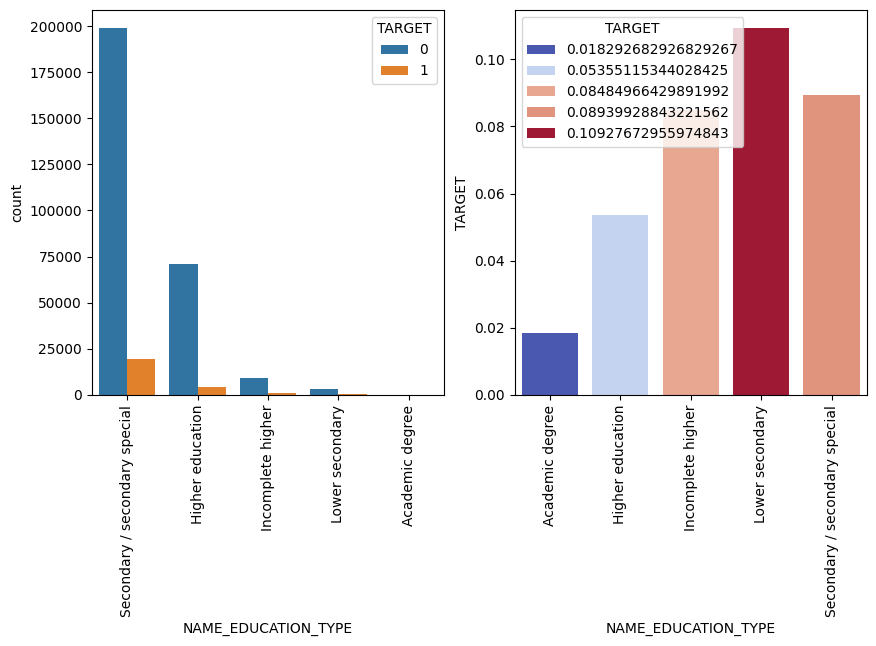

secondary/secondary special has given most of the loans and the default rate is ~8% 
 Higher education loan is around 800k and default rate is ~5.5% which is ~450k which asume to be safest loan 


In [95]:
data_pct_education= app_score_col_rmvd[['NAME_EDUCATION_TYPE','TARGET']].groupby(['NAME_EDUCATION_TYPE'],as_index=False).mean()
data_pct_education

plt.figure(figsize=(10,5)) #ploting figure size

plt.subplot(1,2,1)  # mentioning the subplot 1
sns.countplot(data=app_score_col_rmvd, x='NAME_EDUCATION_TYPE',hue='TARGET')
plt.xticks(rotation=90) #rotating the x axis labels

plt.subplot(1,2,2)  # mentioning the subplot 2
sns.barplot(data=data_pct_education,x='NAME_EDUCATION_TYPE',y='TARGET', hue='TARGET' ,palette='coolwarm')
plt.xticks(rotation=90) #rotating the x axis labels
plt.show() #showing the plot

print('secondary/secondary special has given most of the loans and the default rate is ~8% \n ' \
'Higher education loan is around 800k and default rate is ~5.5% which is ~450k which asume to be safest loan ' )

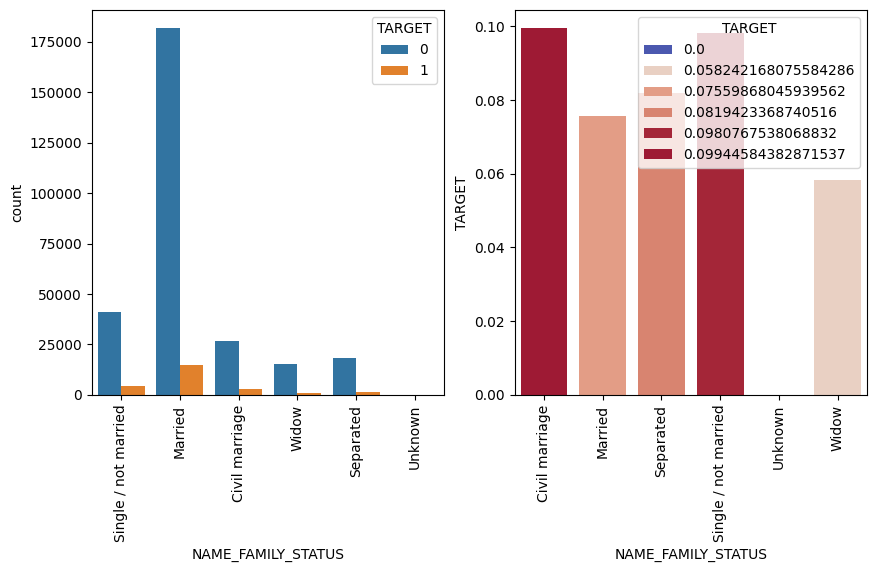

most of the default customer in segemnt civil amriage and not married secter 
 and the safest segment is married and widowed 


In [96]:
data_pct_fstatus= app_score_col_rmvd[['NAME_FAMILY_STATUS','TARGET']].groupby(['NAME_FAMILY_STATUS'],as_index=False).mean()
data_pct_fstatus

plt.figure(figsize=(10,5)) #ploting figure size

plt.subplot(1,2,1)  # mentioning the subplot 1
sns.countplot(data=app_score_col_rmvd, x='NAME_FAMILY_STATUS',hue='TARGET')
plt.xticks(rotation=90) #rotating the x axis labels

plt.subplot(1,2,2)  # mentioning the subplot 2
sns.barplot(data=data_pct_fstatus,x='NAME_FAMILY_STATUS',y='TARGET', hue='TARGET' ,palette='coolwarm')
plt.xticks(rotation=90) #rotating the x axis labels
plt.show() #showing the plot

print('most of the default customer in segemnt civil amriage and not married secter \n and the safest segment is married and widowed ' )

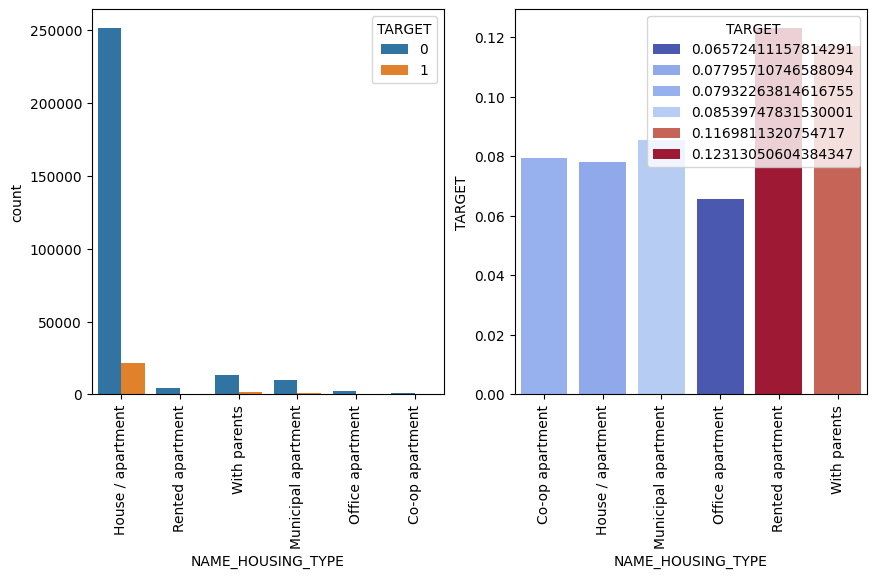

most of the loans are taken by the customers who are living in their own house 
 and the default rate is ~7% which is safer and lesser than other housing types 



In [98]:
data_pct_hosue= app_score_col_rmvd[['NAME_HOUSING_TYPE','TARGET']].groupby(['NAME_HOUSING_TYPE'],as_index=False).mean()
data_pct_hosue

plt.figure(figsize=(10,5)) #ploting figure size

plt.subplot(1,2,1)  # mentioning the subplot 1
sns.countplot(data=app_score_col_rmvd, x='NAME_HOUSING_TYPE',hue='TARGET')
plt.xticks(rotation=90) #rotating the x axis labels

plt.subplot(1,2,2)  # mentioning the subplot 2
sns.barplot(data=data_pct_hosue,x='NAME_HOUSING_TYPE',y='TARGET', hue='TARGET' ,palette='coolwarm')
plt.xticks(rotation=90) #rotating the x axis labels
plt.show() #showing the plot

print('most of the loans are taken by the customers who are living in their own house \n and the default rate is ~7% which is safer and lesser than other housing types \n')


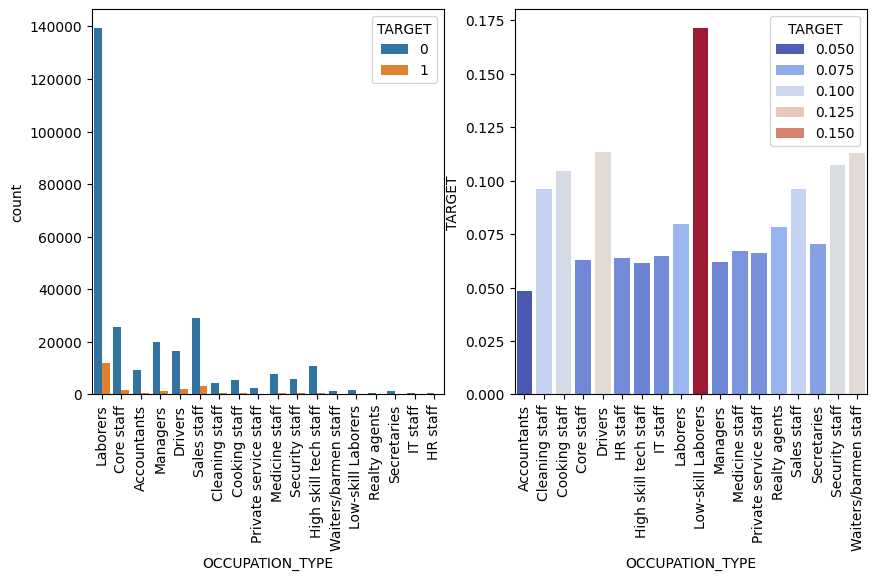

 most of the loans are taken by the customers who are working in the laborers and sales staff 
 and the default rate is ~8% which is safer and lesser than other occupation types 



In [102]:
data_pct_occupation= app_score_col_rmvd[['OCCUPATION_TYPE','TARGET']].groupby(['OCCUPATION_TYPE'],as_index=False).mean()
data_pct_occupation

plt.figure(figsize=(10,5)) #ploting figure size

plt.subplot(1,2,1)  # mentioning the subplot 1
sns.countplot(data=app_score_col_rmvd, x='OCCUPATION_TYPE',hue='TARGET')
plt.xticks(rotation=90) #rotating the x axis labels

plt.subplot(1,2,2)  # mentioning the subplot 2
sns.barplot(data=data_pct_occupation,x='OCCUPATION_TYPE',y='TARGET', hue='TARGET' ,palette='coolwarm')
plt.xticks(rotation=90) #rotating the x axis labels
plt.show() #showing the plot

print(' most of the loans are taken by the customers who are working in the laborers and sales staff \n and the default rate is ~8% which is safer and lesser than other occupation types \n')


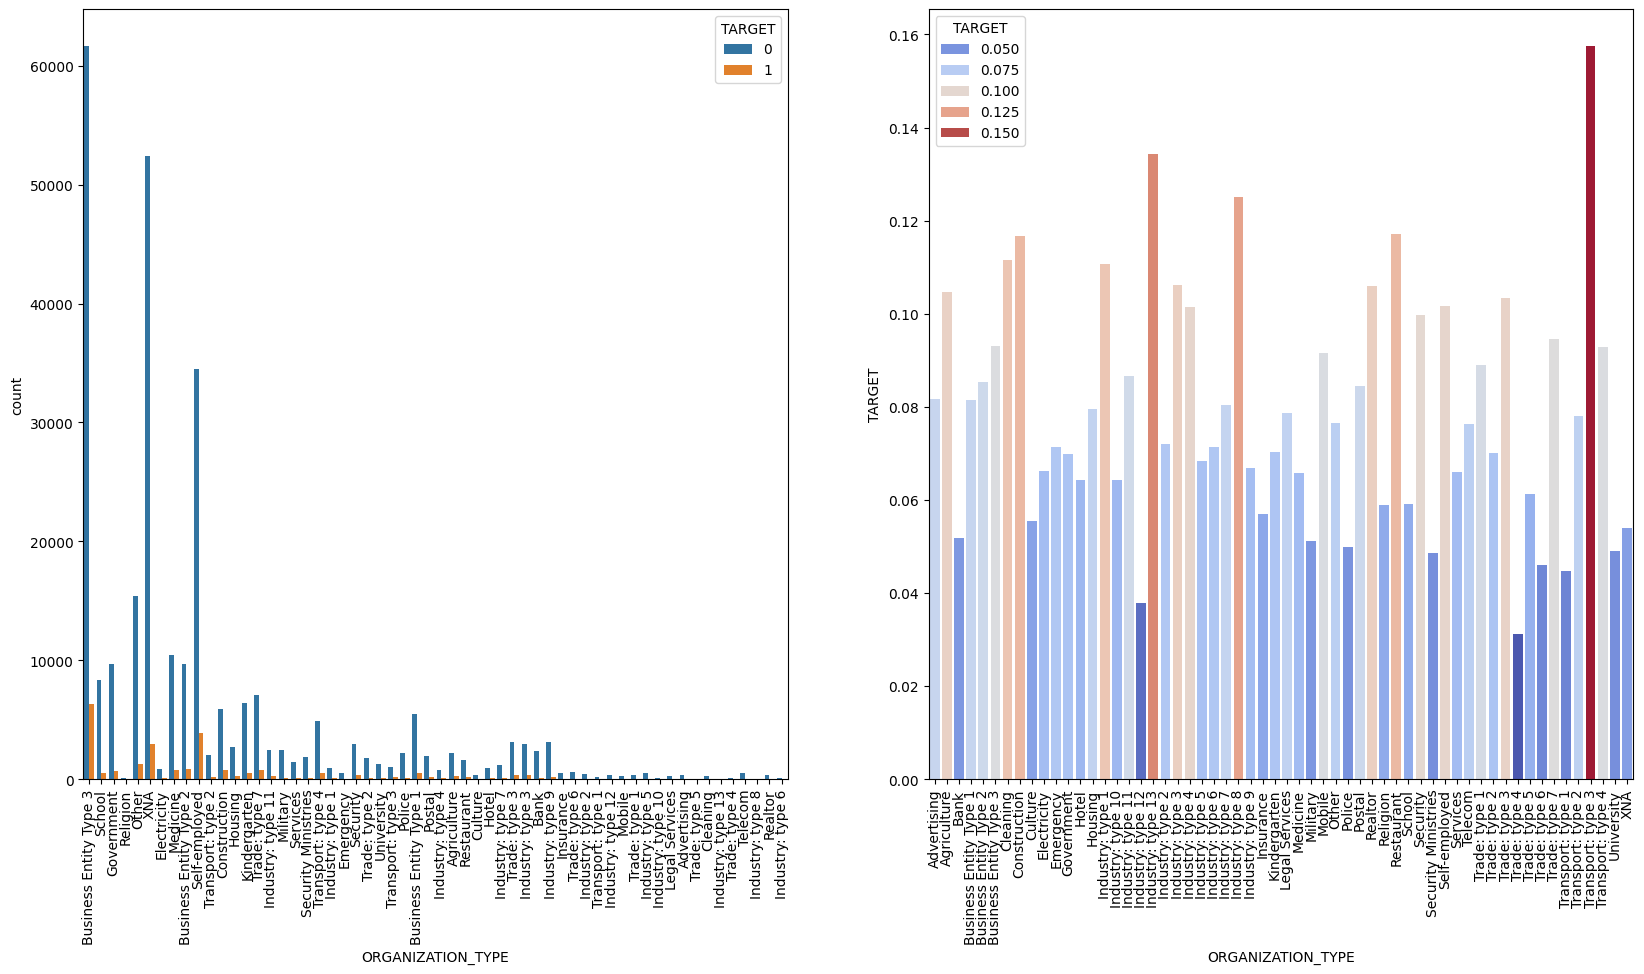

 most of the loans are taken by the customers who are working in the business sector 
 and the default rate is ~8% which is safer and lesser than other organization types 



In [103]:
data_pct_organization= app_score_col_rmvd[['ORGANIZATION_TYPE','TARGET']].groupby(['ORGANIZATION_TYPE'],as_index=False).mean()
data_pct_organization

plt.figure(figsize=(20,10)) #ploting figure size

plt.subplot(1,2,1)  # mentioning the subplot 1
sns.countplot(data=app_score_col_rmvd, x='ORGANIZATION_TYPE',hue='TARGET')
plt.xticks(rotation=90) #rotating the x axis labels

plt.subplot(1,2,2)  # mentioning the subplot 2
sns.barplot(data=data_pct_organization,x='ORGANIZATION_TYPE',y='TARGET', hue='TARGET' ,palette='coolwarm')
plt.xticks(rotation=90) #rotating the x axis labels
plt.show() #showing the plot

print(' most of the loans are taken by the customers who are working in the business sector \n and the default rate is ~8% which is safer and lesser than other organization types \n')

In [ ]:
'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'